# 词嵌入

In [2]:
from keras.layers import Embedding

In [3]:
embedding_layer = Embedding(1000, 64)

In [5]:
from keras.datasets import imdb
from keras import preprocessing

In [6]:
max_features = 10000
maxlen = 20

In [19]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [20]:
x_train.shape

(25000,)

In [21]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [16]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [22]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_train.shape

(25000, 20)

In [23]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [24]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [25]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [26]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 93us/step - loss: 0.6759 - acc: 0.6043 - val_loss: 0.6398 - val_acc: 0.6810
Epoch 2/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.5657 - acc: 0.7428 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.4263 - acc: 0.8079 - val_loss: 0.5008 - val_acc: 0.7454
Epoch 5/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.3930 - acc: 0.8257 - val_loss: 0.4981 - val_acc: 0.7540
Epoch 6/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5013 - val_acc: 0.7534
Epoch 7/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.3435 - acc: 0.8534 - val_loss: 0.5051 - val_acc:

# 对IMDB原始数据的文本进行分词

In [1]:
import os

In [2]:
imdb_dir = '../dataset/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    #os.listdir() 方法用于返回指定的文件夹包含的文件或文件夹的名字的列表。这个列表以字母顺序。
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            '''
            'r' : 以只读方式打开文件。文件指针将会放在文件的开头。
            'rb': 以二进制格式打开一个文件用于只读。文件指针将会放在文件的开头。
            '''
            f = open(os.path.join(dir_name, fname), 'r', encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
print(len(texts), len(labels))

25000 25000


In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [104]:
maxlen = 100
training_samples = 200 #20000 #200
validation_samples = 10000 #5000 #10000
max_words = 10000

In [105]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [106]:
len(sequences)

25000

In [107]:
word_index = tokenizer.word_index
word_index

{'tss': 38513,
 "'moon'": 67255,
 'motivations': 4801,
 "jersild's": 77432,
 'hargh': 56827,
 'pincher': 66750,
 'clientel': 71888,
 'florid': 29486,
 'mme': 36382,
 'slowly': 1361,
 "xuejian's": 84341,
 'verify': 20535,
 'rossario': 63450,
 "krumholz's": 63681,
 'shakespere': 36500,
 'protrude': 42556,
 '3rds': 30607,
 'recommmend': 73658,
 'dobson': 42837,
 'sooooooooooooooooooooo': 77546,
 'dye': 14276,
 'nixon': 9504,
 '3dfx': 61805,
 'classroom': 12061,
 'splinters': 85594,
 "caan's": 46585,
 'unseen': 5333,
 'believably': 14523,
 "jeweler's": 51220,
 'bbc4': 48745,
 'globalism': 34805,
 'yardstick': 31516,
 'funereal': 39321,
 'sexworker': 58619,
 "harris'": 21847,
 'costello’s': 72627,
 'philadelphia': 6459,
 'implanting': 49027,
 'danilow': 83374,
 "ability's": 85056,
 'winstone': 18677,
 'untouchable': 32404,
 'adverterous': 78345,
 'ooohs': 60341,
 'fantsies': 85647,
 "'murphy's": 67374,
 'miserly': 66787,
 "'better": 46229,
 'wickedly': 16385,
 'movielover': 66010,
 'roti': 

In [108]:
print('Found %s unique tokens.' % len(word_index))

Found 87393 unique tokens.


In [109]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[   9,  115,   22, ...,   32,  522,    8],
       [6871,   45,   85, ...,  181,  445,  154],
       [1605,  140, 5832, ...,    8,    1,  179],
       ...,
       [   4, 1017,    2, ...,   35,  310,   43],
       [   4,    1,  168, ...,   26, 1219, 6074],
       [   5, 4895,   41, ...,   55,  107, 4274]])

In [110]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label shape:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label shape: (25000,)


In [111]:
#arange([start,] stop[, step,], dtype=None)
indices = np.arange(data.shape[0])
print(indices)
np.random.shuffle(indices)
print(indices)

[    0     1     2 ... 24997 24998 24999]
[ 5349 11218  6591 ... 20957  9048 21264]


In [112]:
#打乱数据
data = data[indices]
labels = labels[indices]

In [113]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

In [114]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(200, 100) (200,)
(10000, 100) (10000,)


In [115]:
glove_dir = 'glove.6B'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), 'r', encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embedding_index))

Found 400000 word vectors.


In [116]:
embedding_index['kadhimiyah'].shape

(100,)

In [117]:
embedding_index.get('kadhimiyah')

array([ 0.18118  , -0.47617  ,  0.63115  ,  0.65705  , -0.25682  ,
        0.57392  , -0.088206 ,  0.18308  ,  0.53689  ,  1.5008   ,
       -0.93949  , -0.42145  ,  0.94633  , -0.07855  ,  0.082304 ,
        0.25514  , -0.23125  , -0.56241  , -0.50394  ,  0.31174  ,
        0.27938  ,  0.060878 ,  0.18037  , -0.44218  , -0.45875  ,
       -0.35773  , -0.15461  ,  0.41014  ,  0.21785  ,  0.41288  ,
       -0.12605  , -1.5263   ,  1.3463   ,  0.46927  , -0.094306 ,
       -0.069884 , -0.41964  , -0.15505  , -0.33467  , -0.0089143,
        0.67408  ,  0.80006  ,  0.38126  , -0.6798   ,  0.15406  ,
        0.033785 ,  0.27789  ,  0.4617   ,  0.095229 , -0.46009  ,
       -0.56015  , -0.054077 , -0.46456  ,  0.18865  , -1.0568   ,
        0.44338  ,  0.0076189, -0.56301  , -0.33477  , -0.52629  ,
        0.0062676, -0.13153  ,  0.94386  ,  0.20453  , -0.18188  ,
        0.26915  , -0.75501  , -0.79321  , -0.29097  , -0.47308  ,
       -0.49211  , -0.34783  ,  0.059117 ,  0.08344  , -0.0991

In [118]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [119]:
embedding_matrix.shape

(10000, 100)

In [120]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [121]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [123]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 1.2827 - acc: 0.5850 - val_loss: 0.6931 - val_acc: 0.5088
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6216 - acc: 0.6900 - val_loss: 0.9242 - val_acc: 0.5035
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6462 - acc: 0.6500 - val_loss: 0.6960 - val_acc: 0.5214
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4814 - acc: 0.7800 - val_loss: 0.6950 - val_acc: 0.5442
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3822 - acc: 0.8150 - val_loss: 0.7844 - val_acc: 0.5263
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2873 - acc: 0.9050 - val_loss: 1.2478 - val_acc: 0.4974
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2681 - acc: 0.8950 - val_loss: 0.7548 - val_acc: 0.5395
Epoch 8/10
200/200 [========

In [124]:
x_train

array([[   2,    1,  270, ...,    3, 3034,    8],
       [   2,    1, 3924, ...,  148, 3015, 2575],
       [   0,    0,    0, ...,  139,  103, 7111],
       ...,
       [   8,   36,   41, ...,   41,    4,  154],
       [ 519, 4393,    5, ...,    6, 1971, 1158],
       [3845,   59, 1023, ...,  265, 6436, 2777]])

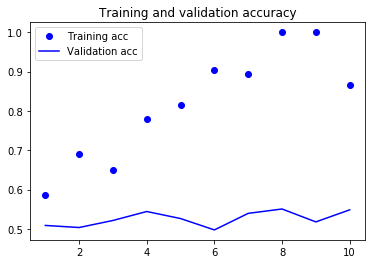

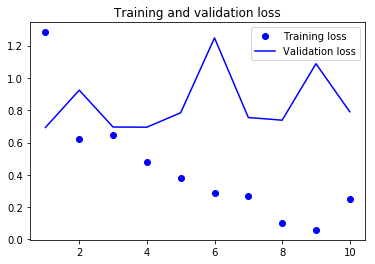

In [125]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [126]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 11ms/step - loss: 0.6979 - acc: 0.5200 - val_loss: 0.6921 - val_acc: 0.5171
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5109 - 

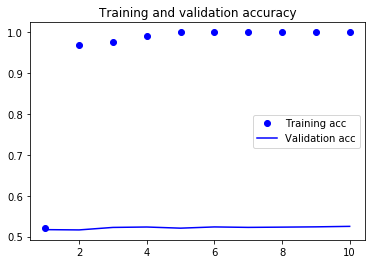

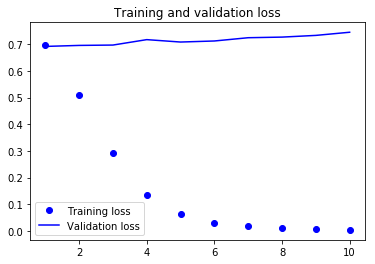

In [127]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [128]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), 'r', encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [129]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [130]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 123us/step


[0.7757889929580688, 0.55712]